## 梯度下降

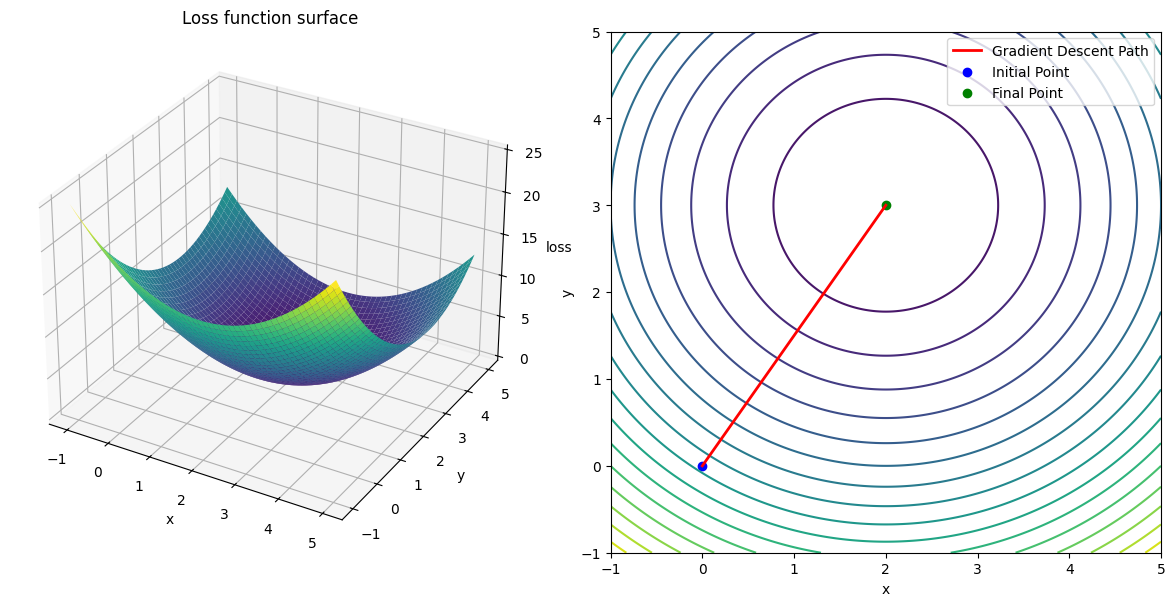

In [5]:
def loss_func(x, y):
    return (x - 2)**2 + (y - 3)**2

def gradient(x, y):
    grad_x = 2 * (x - 2)
    grad_y = 2 * (y - 3)
    return grad_x, grad_y

def gradient_descent(initial_point, learning_rate, num_iterations):
    x, y = initial_point
    trajectory = [(x, y)]
    for i in range(num_iterations):
        grad_x, grad_y = gradient(x, y)
        x -= learning_rate * grad_x
        y -= learning_rate * grad_y
        trajectory.append((x, y))
    return trajectory

initial_point = (0, 0)
learning_rate = 0.1
num_iterations = 100

trajectory = gradient_descent(initial_point, learning_rate, num_iterations)

import numpy as np
trajectory = np.array(trajectory)

x_vals = np.linspace(-1, 5, 400)
y_vals = np.linspace(-1, 5, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = loss_func(X, Y)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis')
ax1.set_title('Loss function surface')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('loss')

ax2 = fig.add_subplot(122)
ax2.contour(X, Y, Z, levels=20, cmap='viridis')
ax2.plot(trajectory[:, 0], trajectory[:, 1], 'r-', linewidth=2, label='Gradient Descent Path')
ax2.scatter(trajectory[0, 0], trajectory[0, 1], color='blue', label='Initial Point')
ax2.scatter(trajectory[-1, 0], trajectory[-1, 1], color='green', label='Final Point')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.legend()

plt.tight_layout()
plt.show()


## 聚类 K-means

>在鸢尾花例子中，聚类就像是在没有任何先验知识的情况下，仅仅根据花的特征（花萼和花瓣的长度和宽度）来将它们分类。

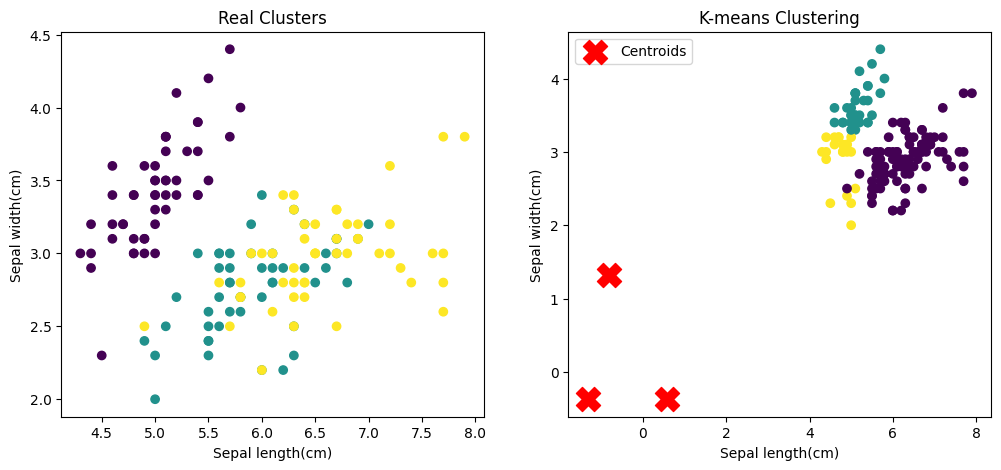

Clustering Accuracy: 0.0

Composition of Cluster 0:
  setosa: 0 samples
  versicolor: 46 samples
  virginica: 50 samples

Composition of Cluster 1:
  setosa: 33 samples
  versicolor: 0 samples
  virginica: 0 samples

Composition of Cluster 2:
  setosa: 17 samples
  versicolor: 4 samples
  virginica: 0 samples


In [6]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

# 数据标准化，目的是将所有特征调整到相同的尺度，这对K-means算法很重要，因为它基于距离计算。

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 模型创建与训练 指定簇的数量为3（因为鸢尾花有3个品种）。random_state=42确保结果可重复。

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# 模型预测 predict方法将每个数据点分配到最近的簇。y_kmeans包含每个数据点的簇标签。

y_kmeans = kmeans.predict(X_scaled)

# 可视化 创建两个子图：左图显示原始数据的真实类别，右图显示K-means聚类的结果。我们只使用前两个特征（萼片长度和宽度）来创建2D散点图。

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(121)
# 原始数据的真实类别
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Real Clusters')
plt.xlabel('Sepal length(cm)')
plt.ylabel('Sepal width(cm)')

# K-means聚类的结果
plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Sepal length(cm)')
plt.ylabel('Sepal width(cm)')
plt.legend()
plt.show()

# 聚类评估

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y, y_kmeans)
print(f'Clustering Accuracy: {accuracy}')

# 分析簇的组成

for i in range(3):
    cluster = np.where(y_kmeans == i)[0]
    print(f'\nComposition of Cluster {i}:')
    for iris_type in range(3):
        count = np.sum(y[cluster] == iris_type)
        print(f'  {iris.target_names[iris_type]}: {count} samples')

## 降维

> 鸢尾花数据集有四个特征：花萼长度、花萼宽度、花瓣长度和花瓣宽度。我们可以想象三维空间，但四维空间超出了我们的直觉。主成分分析（Principal Component Analysis，PCA）要做的就是试图找到数据变化最大的方向（我们称之为主成分），然后用这些方向来表示数据。


In [7]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 应用PCA
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 分析主成分
explained_variance_ratio = pca.explained_variance_ratio_
print(f'Explained Variance Ratio: {explained_variance_ratio}')

# 分析主成分组成
print("主成分的特征向量:")
for i, component in enumerate(pca.components_):
    print(f'PC-{i}: {component}')

print("\n原始特征与主成分的相关性:")
for i, component in enumerate(pca.components_):
    correlations = component * np.sqrt(pca.explained_variance_[i])
    print(f'PC-{i+1}:')
    for j, corr in enumerate(correlations):
        print(f'  {iris.feature_names[j]}: {corr:.3f}')

Explained Variance Ratio: [0.72962445 0.22850762 0.03668922 0.00517871]
主成分的特征向量:
PC-0: [ 0.52106591 -0.26934744  0.5804131   0.56485654]
PC-1: [0.37741762 0.92329566 0.02449161 0.06694199]
PC-2: [ 0.71956635 -0.24438178 -0.14212637 -0.63427274]
PC-3: [-0.26128628  0.12350962  0.80144925 -0.52359713]

原始特征与主成分的相关性:
PC-1:
  sepal length (cm): 0.893
  sepal width (cm): -0.462
  petal length (cm): 0.995
  petal width (cm): 0.968
PC-2:
  sepal length (cm): 0.362
  sepal width (cm): 0.886
  petal length (cm): 0.023
  petal width (cm): 0.064
PC-3:
  sepal length (cm): 0.277
  sepal width (cm): -0.094
  petal length (cm): -0.055
  petal width (cm): -0.244
PC-4:
  sepal length (cm): -0.038
  sepal width (cm): 0.018
  petal length (cm): 0.116
  petal width (cm): -0.076
